In [114]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [125]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [126]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
x_train, x_test = x_train / 255., x_test / 255.


In [117]:
model = Sequential([
    Dense(256, activation='sigmoid', input_shape=(784,)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [118]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               200960    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [119]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

y_val = to_categorical(y_val, dtype ="uint8")
partial_y_train = to_categorical(partial_y_train, dtype ="uint8")

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=76,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/76
98/98 [==============================] - 45s 224ms/step - loss: 1.2114 - accuracy: 0.6461 - val_loss: 0.7494 - val_accuracy: 0.7313
Epoch 2/76
98/98 [==============================] - 18s 182ms/step - loss: 0.6367 - accuracy: 0.7743 - val_loss: 0.5750 - val_accuracy: 0.7944
Epoch 3/76
98/98 [==============================] - 19s 200ms/step - loss: 0.5340 - accuracy: 0.8090 - val_loss: 0.5205 - val_accuracy: 0.8176
Epoch 4/76
98/98 [==============================] - 18s 188ms/step - loss: 0.4896 - accuracy: 0.8233 - val_loss: 0.4682 - val_accuracy: 0.8292
Epoch 5/76
98/98 [==============================] - 19s 197ms/step - loss: 0.4612 - accuracy: 0.8341 - val_loss: 0.4622 - val_accuracy: 0.8304
Epoch 6/76
98/98 [==============================] - 18s 186ms/step - loss: 0.4401 - accuracy: 0.8413 - val_loss: 0.4355 - val_accuracy: 0.8418
Epoch 7/76
98/98 [==============================] - 19s 195ms/step - loss: 0.4270 - accuracy: 0.8459 - val_loss: 0.4708 - val_accuracy: 0.8236

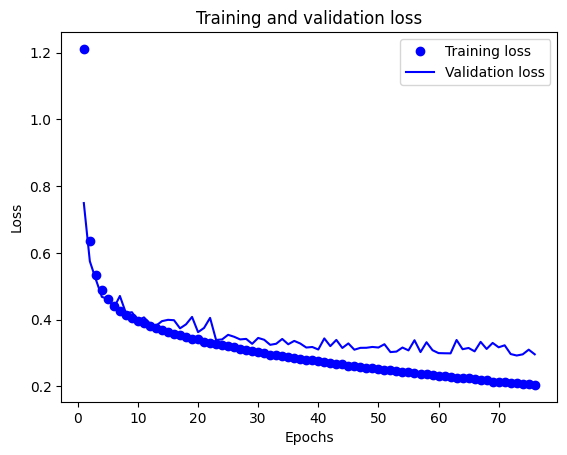

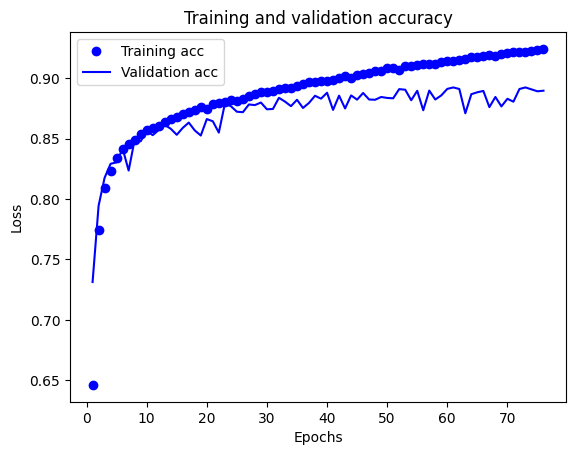

In [121]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [127]:
y_test = to_categorical(y_test, dtype ="uint8")
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 26s 13ms/step - loss: 0.3373 - accuracy: 0.8813
[0.33726537227630615, 0.8812999725341797]


In [123]:
print([x for x in (enumerate(history.history["val_accuracy"])) if x[1] == max(history.history["val_accuracy"])])
print([x for x in (enumerate(history.history["val_loss"])) if x[1] == min(history.history["val_loss"])])

[(60, 0.8924000263214111), (72, 0.8924000263214111)]
[(72, 0.2924116253852844)]
